# Import libraries

In [93]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model as logistic
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
df = pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Analysis on the dataframe

In [11]:
column_to_analyse = df.describe().columns

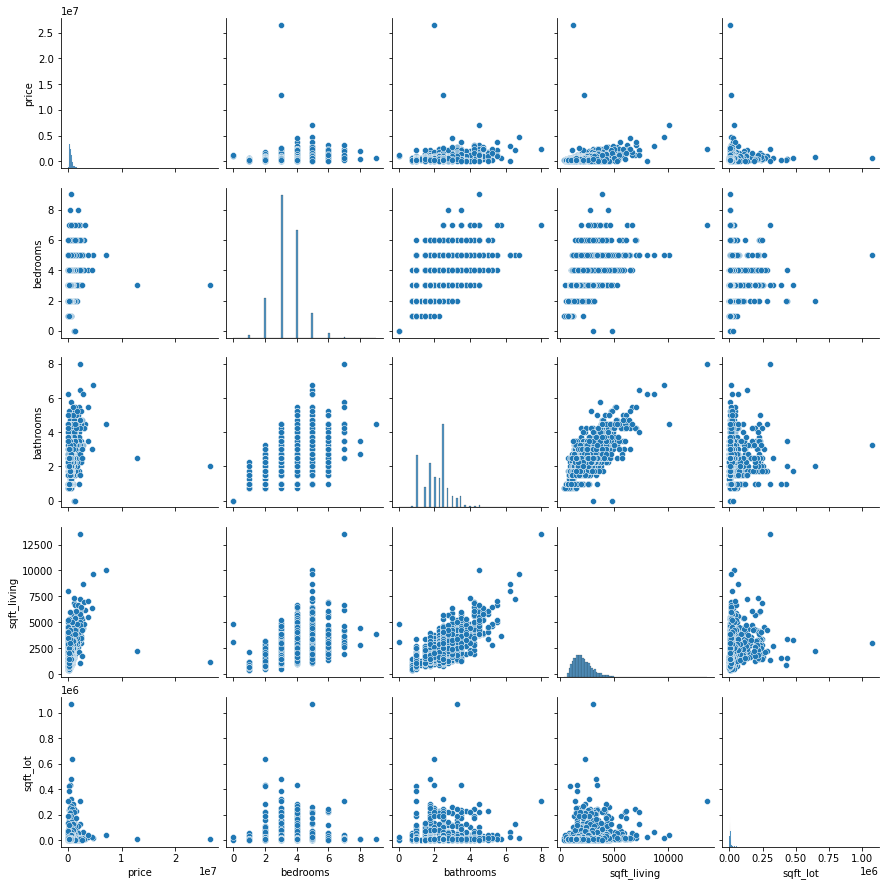

In [32]:
sns.pairplot(df[['price','bedrooms','bathrooms','sqft_living','sqft_lot']])
plt.show()

<AxesSubplot:>

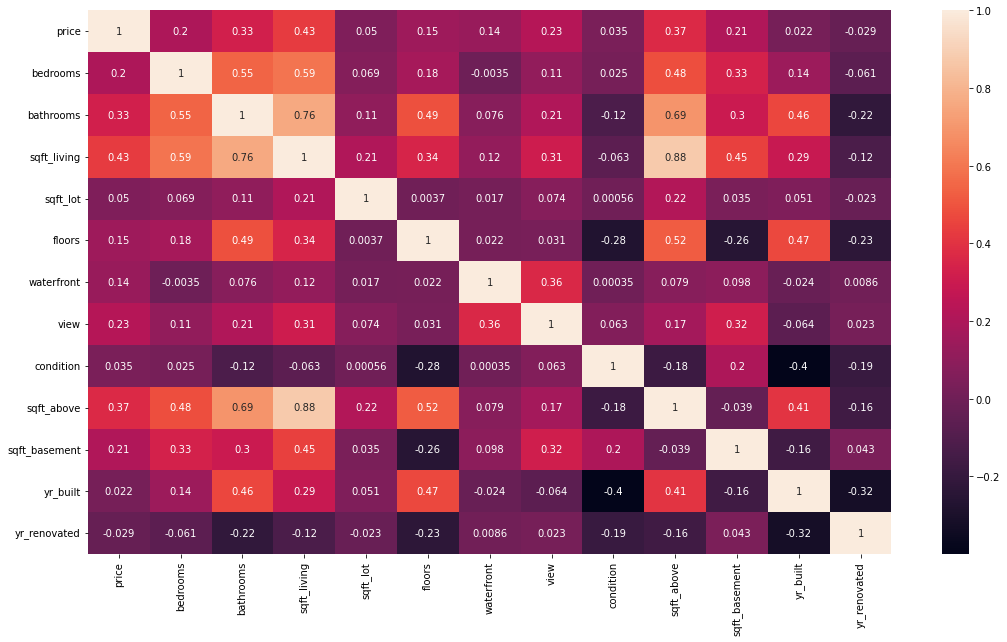

In [71]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

# Linear regression using sklearn

In [53]:
Y = df["price"]
Y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [73]:
X= df[["bathrooms","sqft_living","sqft_above"]]
X

,bathrooms,sqft_living,sqft_above
0,1.50,1340,1340
1,2.50,3650,3370
2,2.00,1930,1930
3,2.25,2000,1000
4,2.50,1940,1140
...,...,...,...
4595,1.75,1510,1510
4596,2.50,1460,1460
4597,2.50,3010,3010
4598,2.00,2090,1070


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, train_size=0.3)

In [75]:
class Multiple_Linear_Regression():   
    def __init__ (self):
        self.theta=np.zeros(int(np.random.random()),float)[:,np.newaxis]; 
    
    def fit(self, X_train, y_train):
        '''
        Fit data to the model based on the matrix approach to Linear Regression. Actual magic happens here!  
        
        PARAMETERS:
        X_train (numpy.ndarray): Independent variables train data.
        y_train (numpy.ndarray): Dependent variable of train data.

        RETURNS:
        None
        '''
        X_b = np.c_[np.ones(len(X_train)), X_train] 
        theta_bst = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
        self.theta = theta_bst
    
    def predict(self, X_test):
        '''
        Fucntion to predict on new data.
        
        PARAMETERS:
        X_test (numpy.ndarray): Independent variables data.

        RETURNS:
        y_predict (numpy.ndarray): Predicted dependent variable.
        '''
        X_test = np.c_[np.ones((len(X_test), 1)), X_test]
        y_predict = np.dot(X_test, self.theta)
        
        return y_predict

In [76]:
model = Multiple_Linear_Regression()

In [77]:
model.fit(X_train, y_train)

In [78]:
y_preds = model.predict(X_test)

In [79]:
y_preds

array([685205.37802793, 581433.54548638, 864935.014328  , ...,
       745040.31432929, 886459.55202389, 279587.23467605])

In [80]:
def mse(y_preds, y):
    '''
    Mean squared error.
    
    PARAMETERS:
    y_preds (numpy.ndarray): Predictions.
    y (numpy.ndarray): Original dependent variable values.
    
    RETURNS:
    mse (float): Mean squared error.
    '''
    mse = ((y - y_preds)**2).mean()
    return mse

def rmse(y_preds, y):
    '''
    Root Mean squared error.
    
    PARAMETERS:
    y_preds (numpy.ndarray): Predictions.
    y (numpy.ndarray): Original dependent variable values.
    
    RETURNS:
    rmse (float): Root Mean Squared Error.
    '''
    rmse = (((y - y_preds)**2).mean())**(1/2)
    return rmse

def r2(y_preds, y):
    '''
    R square score.
    
    PARAMETERS:
    y_preds (numpy.ndarray): Predictions.
    y (numpy.ndarray): Original dependent variable values.
    
    RETURNS:
    r2 (float): R-Squared score.
    '''
    ssr = sum((y - y_preds) ** 2) 
    sst = sum((y - y.mean()) ** 2) 
    return 1 - ssr/sst

In [81]:
mse(y_preds, y_test), rmse(y_preds, y_test), r2(y_preds ,y_test)

(294184776180.22003, 542388.0310075252, 0.17185488173236418)

# Proximal Gradient Descent

In [82]:
def fmin_cgprox(f, f_prime, g_prox, x0, rtol=1e-6,
                maxiter=1000, verbose=0, default_step_size=1.):
    """
    proximal gradient-descent solver for optimization problems of the form
                       minimize_x f(x) + g(x)
    where f is a smooth function and g is a (possibly non-smooth)
    function for which the proximal operator is known.
    Parameters
    ----------
    f : callable
        f(x) returns the value of f at x.
    f_prime : callable
        f_prime(x) returns the gradient of f.
    g_prox : callable of the form g_prox(x, alpha)
        g_prox(x, alpha) returns the proximal operator of g at x
        with parameter alpha.
    x0 : array-like
        Initial guess
    maxiter : int
        Maximum number of iterations.
    verbose : int
        Verbosity level, from 0 (no output) to 2 (output on each iteration)
    default_step_size : float
        Starting value for the line-search procedure.
    Returns
    -------
    res : OptimizeResult
        The optimization result represented as a
        ``scipy.optimize.OptimizeResult`` object. Important attributes are:
        ``x`` the solution array, ``success`` a Boolean flag indicating if
        the optimizer exited successfully and ``message`` which describes
        the cause of the termination. See `scipy.optimize.OptimizeResult`
        for a description of other attributes.
    """
    xk = x0
    fk_old = np.inf

    fk, grad_fk = f(xk), f_prime(xk)
    success = False
    for it in range(maxiter):
        # .. step 1 ..
        # Find suitable step size
        step_size = default_step_size  # initial guess
        grad_fk = f_prime(xk)
        while True:  # adjust step size
            xk_grad = xk - step_size * grad_fk
            prx = g_prox(xk_grad, step_size)
            Gt = (xk - prx) / step_size
            lhand = f(xk - step_size * Gt)
            rhand = fk - step_size * grad_fk.dot(Gt) + \
                (0.5 * step_size) * Gt.dot(Gt)
            if lhand <= rhand:
                # step size found
                break
            else:
                # backtrack, reduce step size
                step_size *= .5

        xk -= step_size * Gt
        fk_old = fk
        fk, grad_fk = f(xk), f_prime(xk)

        if verbose > 1:
            print("Iteration %s, Error: %s" % (it, linalg.norm(Gt)))

        if np.abs(fk_old - fk) / fk < rtol:
            if verbose:
                print("Achieved relative tolerance at iteration %s" % it)
                success = True
            break
    else:
        warnings.warn(
            "fmin_cgprox did not reach the desired tolerance level",
            RuntimeWarning)

    return optimize.OptimizeResult(
        x=xk, success=success, fun=fk, jac=grad_fk, nit=it)

In [91]:
def logloss(x):
    return logistic._logistic_loss(x, X, y, 1.)

def fprime_logloss(x):
    return logistic._logistic_loss_and_grad(x, X, y, 1.)[1]

def g_prox(x, alpha):
    return x



In [94]:
opt = fmin_cgprox(logloss, fprime_logloss, g_prox, np.zeros(4),rtol=1e-12)
opt

AttributeError: module 'sklearn.linear_model' has no attribute '_logistic_loss'